In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import xarray as xr
import io

In [ ]:
xr_df = xr.open_dataset('gistemp1200_GHCNv4_ERSSTv5.nc')
xr_df

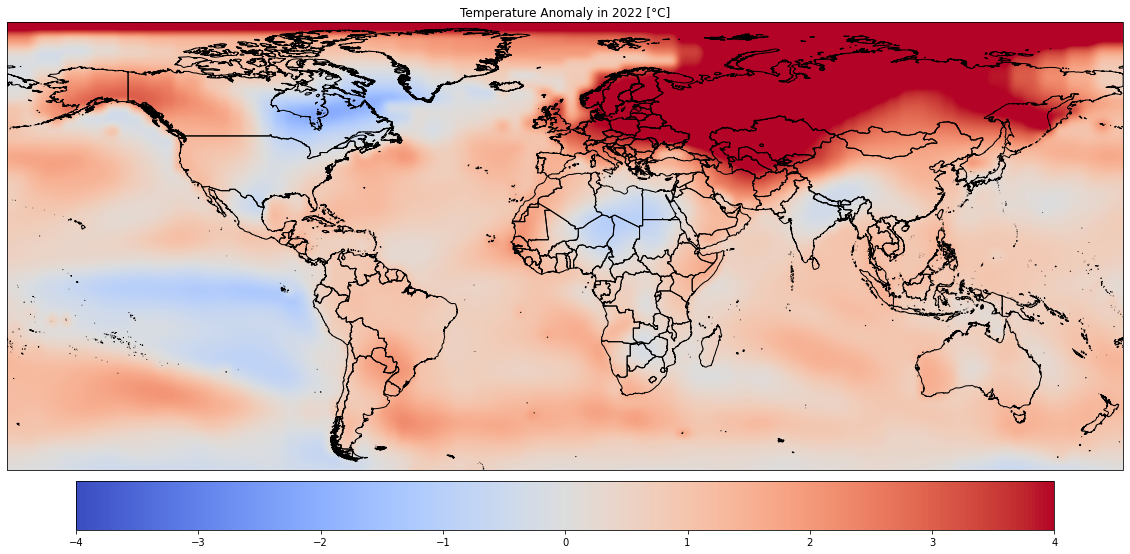

In [3]:
climate = xr_df.resample(time='Y').mean()
anomaly = climate['tempanomaly']

cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.045,
    'pad': 0.01,
    'extend':'neither'
}

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')
ax.set_extent([-150, 150, -55, 85])

i=-1
date =  pd.to_datetime(anomaly.isel(time=i)['time'].values)
ax.set_title("Temperature Anomaly in "+ str(date.year) + " [°C]")
anomaly.isel(time=i).plot.imshow(ax=ax, add_labels=False, add_colorbar=True,
               vmin=-4, vmax=4, cmap='coolwarm',
               cbar_kwargs=cbar_kwargs, interpolation='bicubic')
plt.savefig("global_map.png", bbox_inches='tight', dpi=150)
plt.show()

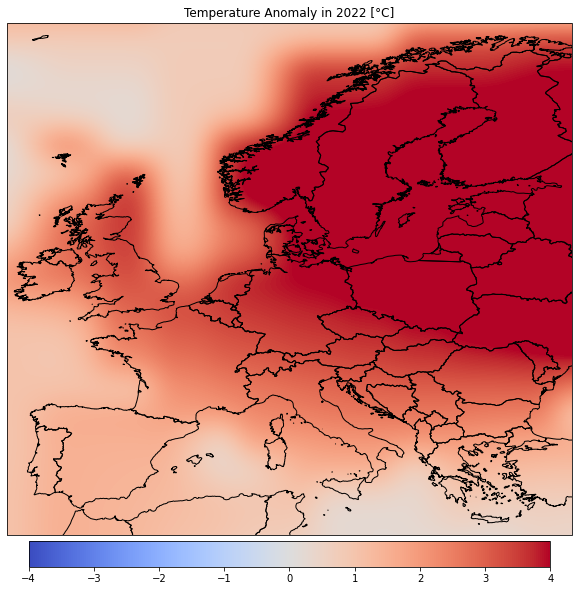

In [4]:
cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.048,
    'pad': 0.01,
    'extend':'neither'
}

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')
ax.set_extent([-11, 31, 34, 71])

i=-1
date =  pd.to_datetime(anomaly.isel(time=i)['time'].values)
ax.set_title("Temperature Anomaly in "+ str(date.year) + " [°C]")
xr.plot.imshow(anomaly.isel(time=i), ax=ax, add_labels=False,
                   vmin=-4, vmax=4, cmap='coolwarm', 
                   cbar_kwargs=cbar_kwargs, interpolation='bicubic')
plt.savefig("european_map.png", bbox_inches='tight', dpi=150)
plt.show()